In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import cv2
import os

In [2]:
#img = image.load_img("Multicategory_Both_8/training/cat/A.jpg")
#plt.imshow(img)
#cv2.imread("Multicategory_Both_8/training/cat/A.jpg").shape

In [3]:
#change range to -0.5 to 0.5?
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [4]:
#Validation dataset not being used...what to do with test dataset?
train_dataset = train.flow_from_directory('Multicategory_Both_8/training',
                                         target_size = (200,200), 
                                         batch_size = 8, #this  should match # of categories
                                         class_mode = 'categorical')
validation_dataset = train.flow_from_directory('Multicategory_Both_8/validation',
                                         target_size = (200,200), 
                                         batch_size = 8, 
                                         class_mode = 'categorical')

Found 82 images belonging to 8 classes.
Found 29 images belonging to 8 classes.


In [5]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(8, activation = 'sigmoid') #to allow independent decisions for each category                                                     
                                    ]) 


In [6]:
model.compile(
    optimizer = RMSprop(lr= 0.001),
    loss = 'binary_crossentropy', #binary decision for each category
    metrics = ['accuracy']
)

In [7]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,#The number of samples per gradient update for training 
                     epochs= 30,#The number of iterations over the entire dataset to train on
                     validation_data = validation_dataset)
#need to find a way to increase the accuracy

Epoch 1/30
3/3 [==============================] - 2s 657ms/step - loss: 1.4861 - accuracy: 0.1667 - val_loss: 0.5018 - val_accuracy: 0.3103
Epoch 2/30
3/3 [==============================] - 2s 727ms/step - loss: 0.5094 - accuracy: 0.0833 - val_loss: 0.4494 - val_accuracy: 0.3103
Epoch 3/30
3/3 [==============================] - 2s 569ms/step - loss: 0.3982 - accuracy: 0.2500 - val_loss: 0.3609 - val_accuracy: 0.2759
Epoch 4/30
3/3 [==============================] - 2s 626ms/step - loss: 0.4064 - accuracy: 0.4583 - val_loss: 0.4030 - val_accuracy: 0.3103
Epoch 5/30
3/3 [==============================] - 1s 441ms/step - loss: 0.4088 - accuracy: 0.2222 - val_loss: 0.3447 - val_accuracy: 0.2759
Epoch 6/30
3/3 [==============================] - 2s 601ms/step - loss: 0.3419 - accuracy: 0.5417 - val_loss: 0.3752 - val_accuracy: 0.2759
Epoch 7/30
3/3 [==============================] - 2s 763ms/step - loss: 0.3916 - accuracy: 0.3750 - val_loss: 0.3482 - val_accuracy: 0.3448
Epoch 8/30
3/3 [====

In [8]:
validation_dataset.class_indices

{'bird': 0,
 'boat': 1,
 'car': 2,
 'cat': 3,
 'dog': 4,
 'living': 5,
 'nonliving': 6,
 'plane': 7}

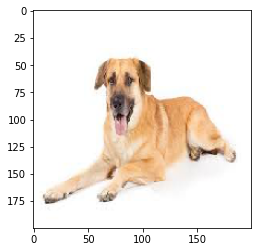

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


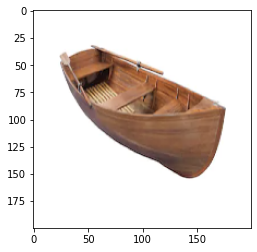

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


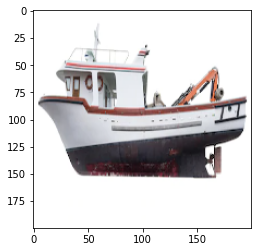

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
Bird


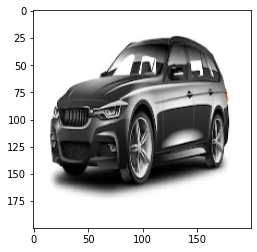

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


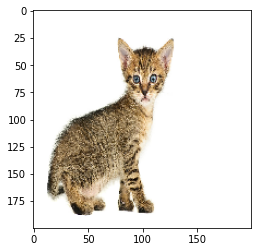

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


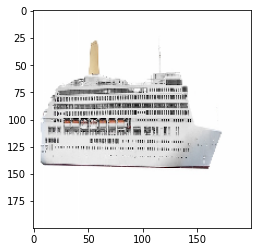

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
Bird


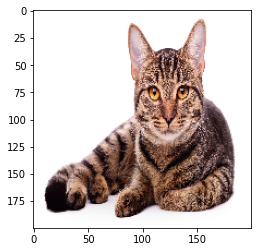

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


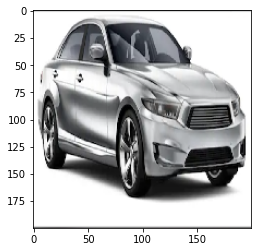

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
Bird


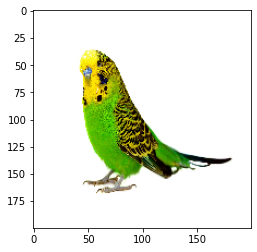

[[0.         0.         0.         0.         0.         0.00170979
  0.         0.        ]]
[5]
Living


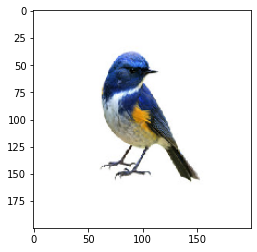

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


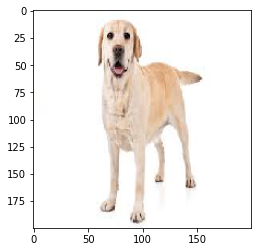

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.05417824e-14 0.00000000e+00 0.00000000e+00]]
[5]
Living


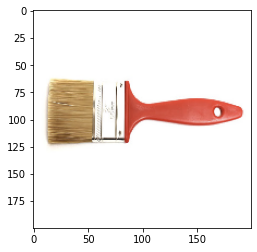

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.7517318e-36 0.0000000e+00 0.0000000e+00]]
[5]
Living


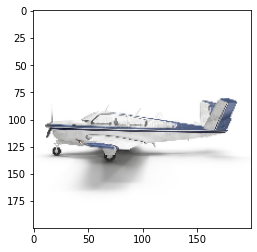

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
Bird


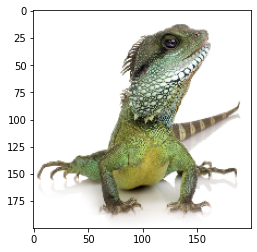

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


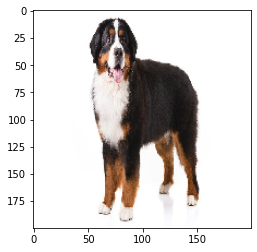

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


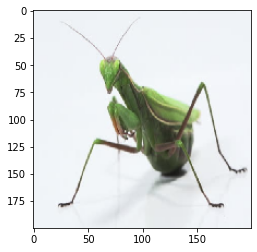

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


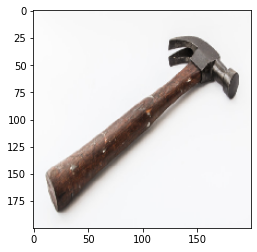

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


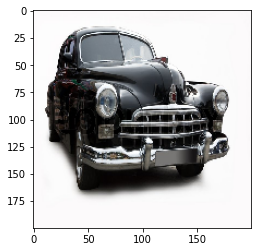

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 5.0868944e-29 0.0000000e+00]]
[6]
Nonliving


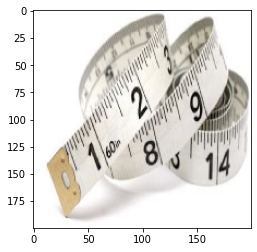

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
Bird


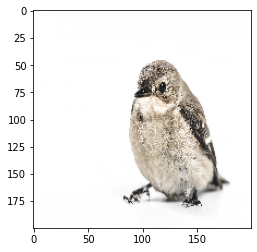

[[0.        0.        0.        0.        0.        0.9176179 0.
  0.       ]]
[5]
Living


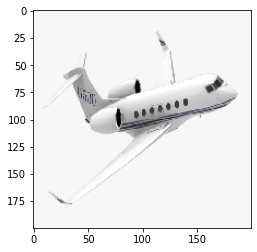

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.3591307e-08 0.0000000e+00 0.0000000e+00]]
[5]
Living


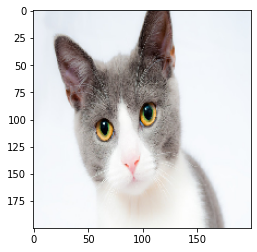

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


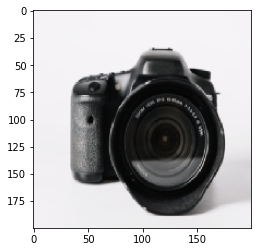

[[0. 0. 0. 0. 0. 1. 0. 0.]]
[5]
Living


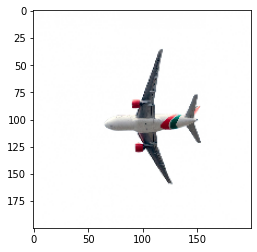

[[0.         0.         0.         0.         0.         0.99432033
  0.         0.        ]]
[5]
Living


In [9]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

dir_path = 'Multicategory_Both_8/testing'
for i in listdir_nohidden(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    #val is an ndarray, so argmax returns the index of the maximum value in each row (axis =1)
    #since these are binary digits, it returns the index where the value is 1, indicating the class index
    #there is also only one row, so it returns one value, appropriate for the if statement
    index = (np.argmax(val, axis = 1))
    print(val)
    print(index)
    if index == 0:
        print("Bird")
    elif index == 1:
        print("Boat")
    elif index == 2:
        print("Car")
    elif index == 3:
        print("Cat")
    elif index == 4:
        print("Dog")
    elif index == 5:
        print("Living")
    elif index == 6:
        print("Nonliving")
    else:
        print("Plane")
        
#produces only bird/0s. why?